In [1]:
import numpy as np
import pandas as pd

Dataset

In [2]:
df = pd.read_csv("apple_quality.csv")
df.head()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Calculates the number of unique values in each column

In [4]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

A_id: 4001 distinct values
Size: 4001 distinct values
Weight: 4001 distinct values
Sweetness: 4001 distinct values
Crunchiness: 4001 distinct values
Juiciness: 4001 distinct values
Ripeness: 4001 distinct values
Acidity: 4001 distinct values
Quality: 3 distinct values


Data Preprocessing 

In [5]:
def clean_data(df):
    
    df = df.drop(columns=['A_id'])
    df = df.dropna()
    df = df.astype({'Acidity': 'float64'})
    
    def label(Quality):
        if Quality == "good":
            return 0
        if Quality == "bad":
            return 1
        return None
    
    df['Label'] = df['Quality'].apply(label)
    df = df.drop(columns=['Quality'])
    df = df.astype({'Label': 'int64'})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0


Histogram

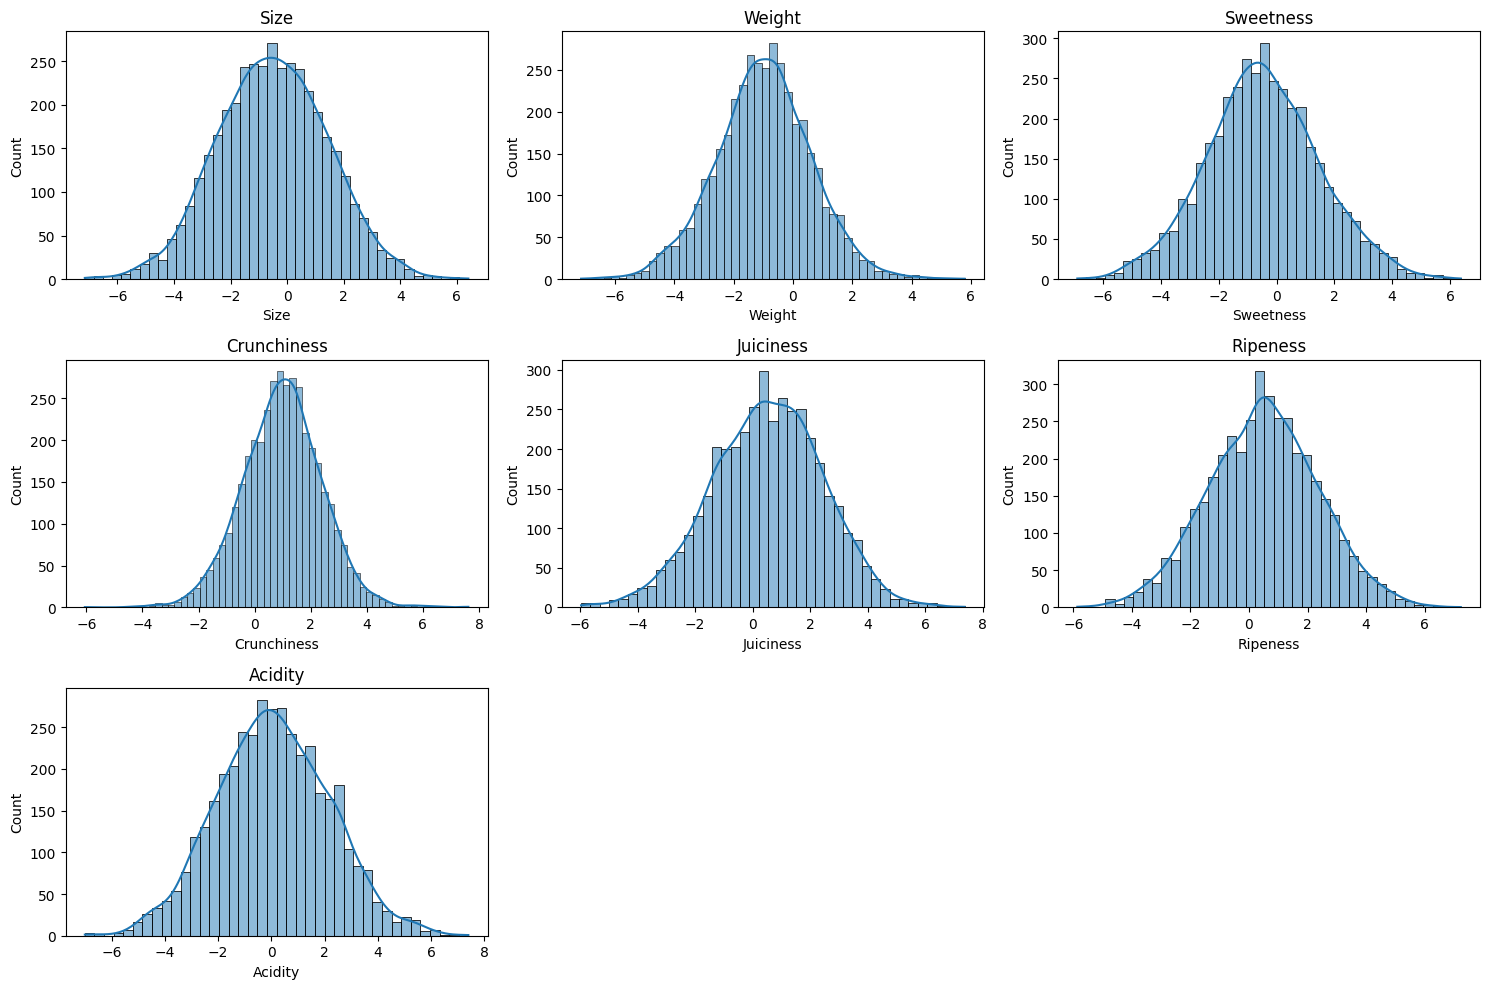

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

plt.figure(figsize=(15, 10))
sns.set_palette("tab10")

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_clean, x=column, kde=True)  
    plt.title(column)

plt.tight_layout()
plt.show()

Correlation Heatmap

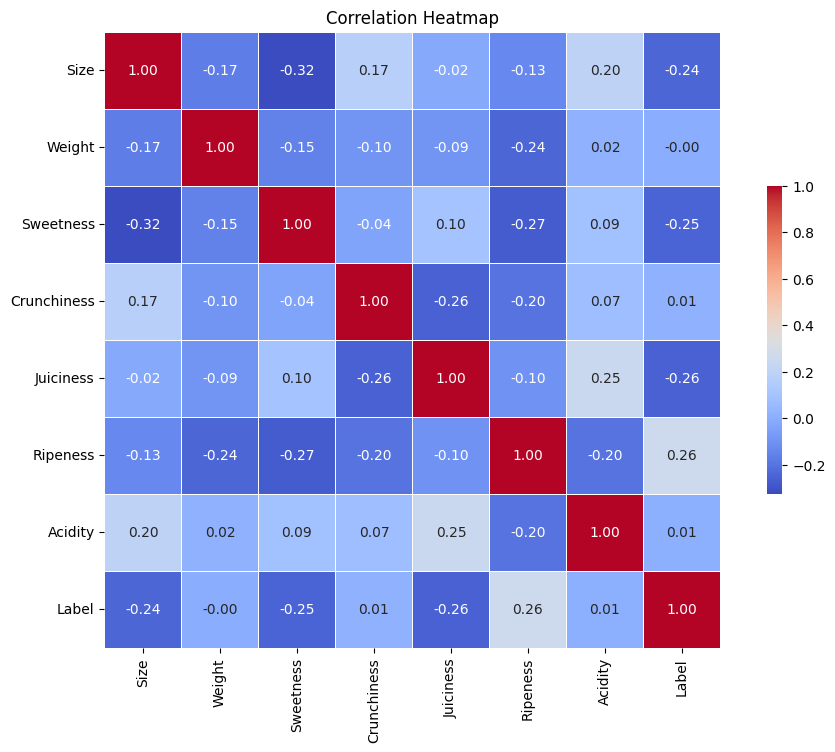

In [7]:
corr_matrix = df_clean.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap')
plt.show()

Split the Data

In [8]:
from sklearn.model_selection import train_test_split

X = df_clean.drop('Label', axis=1)  
y = df_clean['Label']             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature importance

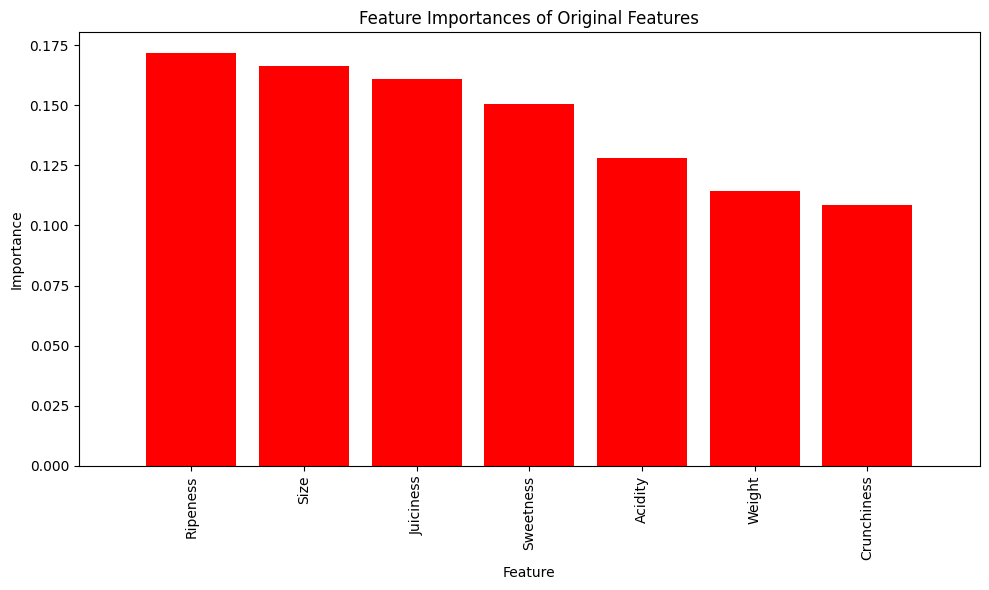

In [9]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize and fit the Random Forest classifier on the original data
random_forest_original = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_original.fit(X, y)

# Get the feature importances
importances_original = random_forest_original.feature_importances_

# Sort the feature importances in descending order
indices_original = np.argsort(importances_original)[::-1]

# Retrieve feature names
feature_names_original = X.columns.tolist()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances of Original Features")
plt.bar(range(X.shape[1]), importances_original[indices_original], color="r", align="center")
plt.xticks(range(X.shape[1]), [feature_names_original[i] for i in indices_original], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()  
plt.show()

PCA

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Initialize PCA and fit it to the scaled training data
pca = PCA(n_components=0.95)  # Keep 95% of variance
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Number of PCA components chosen:", pca.n_components_)


Number of PCA components chosen: 6


Modeling


SVC

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Set the range of parameters to be tested during hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the GridSearchCV object with SVC model and the parameter grid
# cv=5 indicates 5-fold cross-validation
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train_pca, y_train)
best_svc = grid_search.best_estimator_

# Print out the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best estimator to make predictions on the test set
y_pred = best_svc.predict(X_test_pca)

# Calculate accuracy and mean absolute error
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy of the optimized SVC: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy of the optimized SVC: 87.75%
Confusion Matrix:
[[351  48]
 [ 50 351]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       399
           1       0.88      0.88      0.88       401

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



Polynomial features

Accuracy of the logistic regression model with polynomial features: 88.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       399
           1       0.88      0.89      0.89       401

    accuracy                           0.89       800
   macro avg       0.89      0.88      0.88       800
weighted avg       0.89      0.89      0.88       800



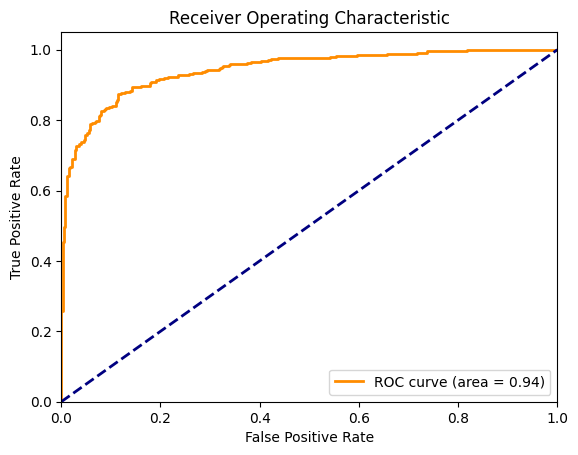

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

poly = PolynomialFeatures(degree=2, include_bias=False)

# Create a pipeline that first adds polynomial features, then scales them, and finally fits a logistic regression model
pipeline = make_pipeline(poly, StandardScaler(), LogisticRegression())

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
class_report = classification_report(y_test, y_pred)

y_score = best_svc.decision_function(X_test_pca)  
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Print the results
print(f"Accuracy of the logistic regression model with polynomial features: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(class_report)

#plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Decision Tree

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error


# Define the parameter grid for the Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object with the Decision Tree model and the parameter grid
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search_dt.fit(X_train_pca, y_train)

# Retrieve the best estimator (best combination of parameters for the Decision Tree)
best_dt = grid_search_dt.best_estimator_

# Print out the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search_dt.best_params_}")

# Use the best estimator to make predictions on the test set
y_pred_dt = best_dt.predict(X_test_pca)

# Calculate accuracy and mean absolute error
dt_acc_score = accuracy_score(y_test, y_pred_dt)

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nAccuracy of the optimized Decision Tree Classifier:", dt_acc_score * 100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Confusion Matrix:
[[351  48]
 [ 50 351]]

Accuracy of the optimized Decision Tree Classifier: 81.0

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       399
           1       0.80      0.82      0.81       401

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



Random Forest


Confusion Matrix:
[[343  56]
 [ 50 351]]

Accuracy of Random Forest Classifier: 86.75

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       399
           1       0.86      0.88      0.87       401

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



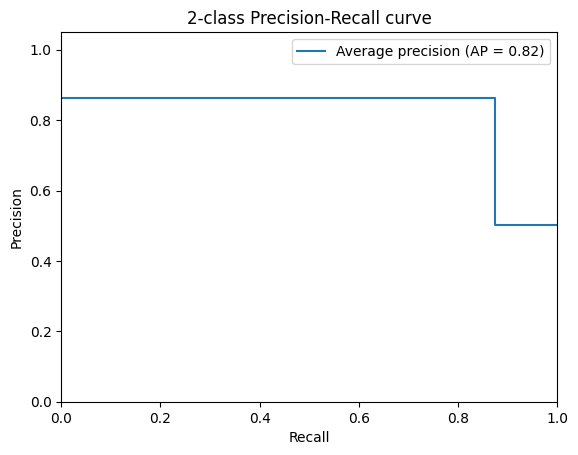

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.metrics import precision_recall_curve, average_precision_score


# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest classifier on the training data
random_forest.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test_pca)

# Evaluate the model
rf_acc_score = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

precision, recall, _ = precision_recall_curve(y_test, y_pred_rf)
average_precision = average_precision_score(y_test, y_pred_rf)


print("\nConfusion Matrix:")
print(rf_conf_matrix)
print("\nAccuracy of Random Forest Classifier:", rf_acc_score * 100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

plt.figure()
plt.step(recall, precision, where='post', label='Average precision (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.legend(loc="best")
plt.show()


XGB 

In [15]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1]
}

# Initialize the GridSearchCV object with XGBClassifier and the parameter grid
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the PCA-transformed training data
grid_search_xgb.fit(X_train_pca, y_train)

# Retrieve the best estimator
best_xgb = grid_search_xgb.best_estimator_

# Print out the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search_xgb.best_params_}")

# Use the best estimator to make predictions on the PCA-transformed test set
y_pred_xgb = best_xgb.predict(X_test_pca)

# Calculate accuracy and mean absolute error
xgb_acc_score = accuracy_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(xgb_conf_matrix)
print("\nAccuracy of the optimized XGBoost Classifier:", xgb_acc_score * 100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}

Confusion Matrix:
[[343  56]
 [ 52 349]]

Accuracy of the optimized XGBoost Classifier: 86.5

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       399
           1       0.86      0.87      0.87       401

    accuracy                           0.86       800
   macro avg       0.87      0.86      0.86       800
weighted avg       0.87      0.86      0.86       800



K-Neighbours


Confusion Matrix:
[[332  67]
 [ 66 335]]

Accuracy of KNN Classifier: 83.375

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       399
           1       0.83      0.84      0.83       401

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



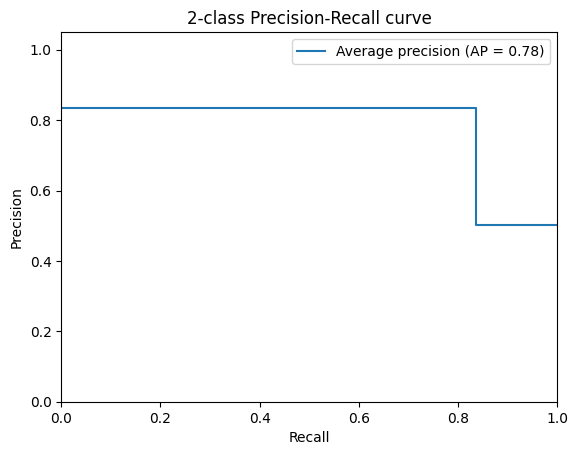

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.metrics import precision_recall_curve, average_precision_score

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier on the training data
knn.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test_pca)

# Evaluate the model
knn_acc_score = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)


precision, recall, _ = precision_recall_curve(y_test, y_pred_knn)
average_precision = average_precision_score(y_test, y_pred_knn)


print("\nConfusion Matrix:")
print(knn_conf_matrix)
print("\nAccuracy of KNN Classifier:", knn_acc_score * 100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

#Precision-Recall Curve
plt.figure()
plt.step(recall, precision, where='post', label='Average precision (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.legend(loc="best")
plt.show()

LGBM

In [17]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

# Define the parameter grid for LGBM
param_grid_lgbm = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Initialize the GridSearchCV object with LGBMClassifier and the parameter grid
grid_search_lgbm = GridSearchCV(LGBMClassifier(random_state=42), param_grid_lgbm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the PCA-transformed training data
grid_search_lgbm.fit(X_train_pca, y_train)

# Retrieve the best estimator
best_lgbm = grid_search_lgbm.best_estimator_

# Print out the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search_lgbm.best_params_}")

# Use the best estimator to make predictions on the PCA-transformed test set
y_pred_lgbm = best_lgbm.predict(X_test_pca)

# Calculate accuracy and mean absolute error
lgbm_acc_score = accuracy_score(y_test, y_pred_lgbm)
lgbm_conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(lgbm_conf_matrix)
print("\nAccuracy of the optimized LGBM Classifier:", lgbm_acc_score * 100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 1595, number of negative: 1605
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498437 -> initscore=-0.006250
[LightGBM] [Info] Start training from score -0.006250
Best parameters found: {'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}

Confusion Matrix:
[[342  57]
 [ 62 339]]

Accuracy of the optimized LGBM Classifier: 85.125

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       399
           1       0.86      0.85      0.85       401

    accuracy                           0.85       800
   macro av

Gaussian Naive Bayes

Cross-validation accuracy scores: [0.7234375 0.7703125 0.7484375 0.7109375 0.740625 ]
Mean CV accuracy: 0.73875

Confusion Matrix:
[[295 104]
 [103 298]]

Accuracy of Gaussian Naive Bayes Classifier: 74.125

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       399
           1       0.74      0.74      0.74       401

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



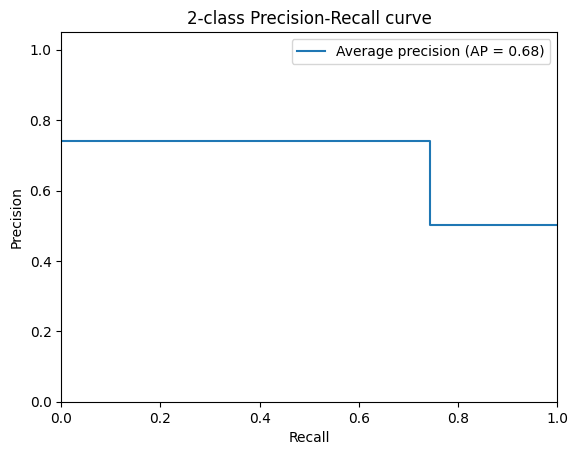

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_curve, average_precision_score

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(gnb, X_train_pca, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean()}")

# Fit the classifier to the training data
gnb.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_gnb = gnb.predict(X_test_pca)

# Evaluate the model
gnb_acc_score = accuracy_score(y_test, y_pred_gnb)
gnb_conf_matrix = confusion_matrix(y_test, y_pred_gnb)

precision, recall, _ = precision_recall_curve(y_test, y_pred_gnb)
average_precision = average_precision_score(y_test, y_pred_gnb)

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(gnb_conf_matrix)
print("\nAccuracy of Gaussian Naive Bayes Classifier:", gnb_acc_score * 100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))

plt.figure()
plt.step(recall, precision, where='post', label='Average precision (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.legend(loc="best")
plt.show()

Gradient Boosting Machines


Confusion Matrix:
[[330  69]
 [ 64 337]]

Accuracy of Gradient Boosting Classifier: 83.375

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       399
           1       0.83      0.84      0.84       401

    accuracy                           0.83       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.83      0.83      0.83       800



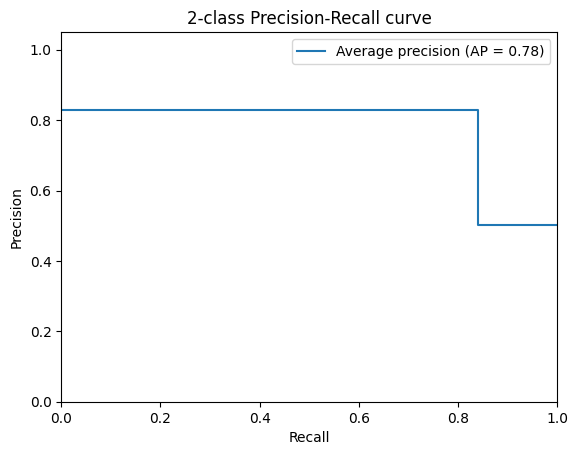

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.metrics import precision_recall_curve, average_precision_score

# Initialize the Gradient Boosting classifier
gbm = GradientBoostingClassifier(random_state=42)

# Fit the Gradient Boosting classifier on the training data
gbm.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_gbm = gbm.predict(X_test_pca)

# Evaluate the model
gbm_acc_score = accuracy_score(y_test, y_pred_gbm)
gbm_conf_matrix = confusion_matrix(y_test, y_pred_gbm)


precision, recall, _ = precision_recall_curve(y_test, y_pred_gbm)
average_precision = average_precision_score(y_test, y_pred_gbm)


print("\nConfusion Matrix:")
print(gbm_conf_matrix)
print("\nAccuracy of Gradient Boosting Classifier:", gbm_acc_score * 100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbm))

plt.figure()
plt.step(recall, precision, where='post', label='Average precision (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.legend(loc="best")
plt.show()